# Clustering

#### Unsupervised Learning

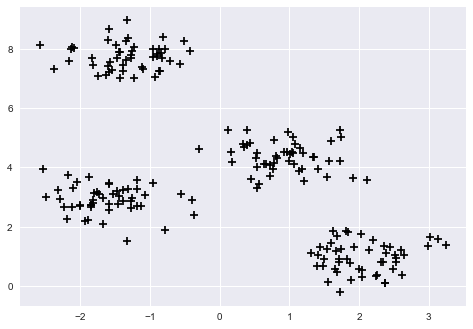

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.style.use('seaborn')

x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50)
plt.show()

In [5]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

## K-means

1- Randomly select centroids (center of cluster) for each cluster.

2- Calculate the distance of all data points to the centroids.

3- Assign data points to the closest cluster.

4- Find the new centroids of each cluster by taking the mean of all data points in the cluster.

5- Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving.

<img src="kmeans.gif">

## Euclidean Distance

$$dist(A,B) = \sqrt{\sum_{i=1}^{n}{(A_i - B_i)^2}}$$

## Minkowski Distance

$$dist(A,B) = \sqrt[p]{\sum_{i=1}^{n}{(A_i - B_i)^p}}$$

* **n_clusters**: the number of desired clusters

* **n_init**: run the k-means clustering algorithms 10 times independently with different random centroids to choose the final model as the one with the lowest SSE
        
* **max_iter**: maximum number of iterations for each run

* **tol**: tolerance regarding the changes in the within-cluster SSE to declare convergence

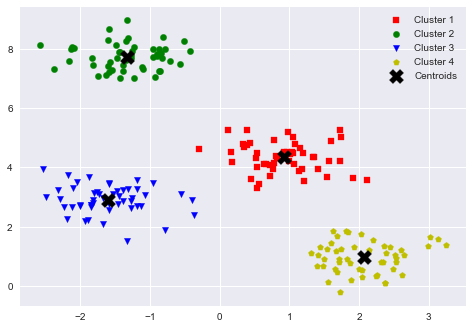

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(x)

plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s', label='Cluster 1')
plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=40, c='g', marker='o', label='Cluster 2')
plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=40, c='b', marker='v', label='Cluster 3')
plt.scatter(x[y_km==3, 0], x[y_km==3, 1], s=40, c='y', marker='p', label='Cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200, marker='X', c='k', label='Centroids')

plt.legend(scatterpoints=1)
plt.show()

### The Elbow Method

**Theorem**: if k increases, the within-cluster SSE (“distortion”) will decrease.
    
**Inertia** is calculated by measuring the distance between each data point and its centroid.

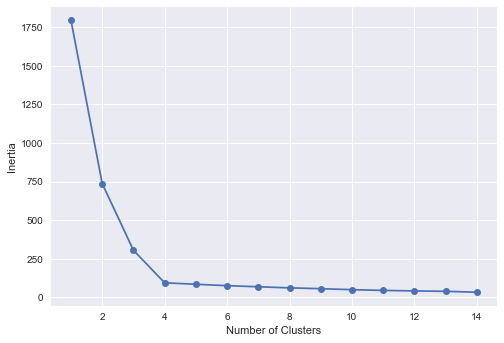

In [10]:
inertias = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(x)
    inertias.append(km.inertia_)
    
plt.plot(range(1,15), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## DBScan

<img src="dbscan.png">

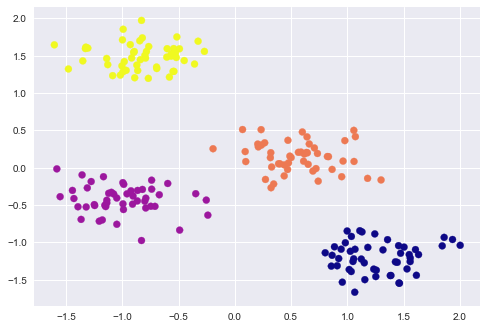

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
newX = scaler.fit_transform(x)

dbscan = DBSCAN(eps=0.35, min_samples=3)

y_db = dbscan.fit_predict(newX)

plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()

## Hierarchical Clustering

In [13]:
import numpy as np
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
x = df.iloc[:, [3,4]].values
pd.DataFrame(x)

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Single-linkage

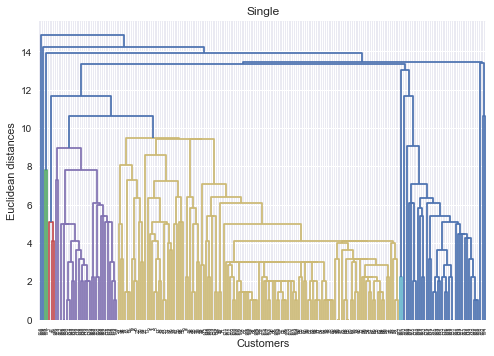

In [17]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method='single'))

plt.title('Single')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Complete linkage

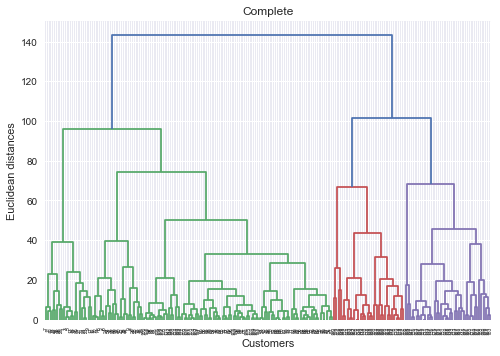

In [18]:
dendrogram = sch.dendrogram(sch.linkage(x, method='complete'))

plt.title('Complete')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Average linkage

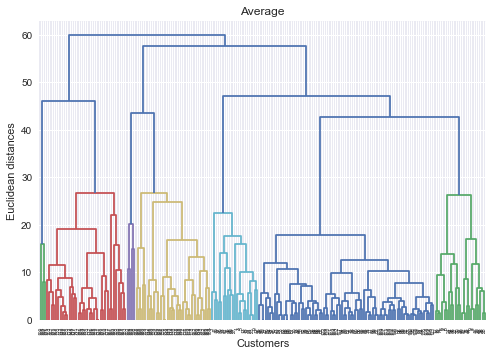

In [19]:
dendrogram = sch.dendrogram(sch.linkage(x, method='average'))

plt.title('Average')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Ward linkage

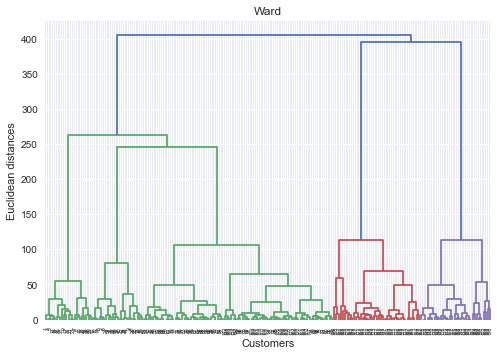

In [20]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

plt.title('Ward')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Agglomerative Clustering

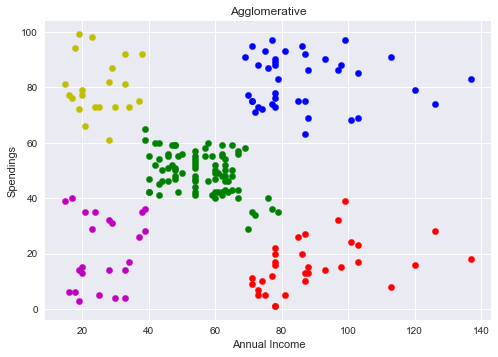

In [26]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

y_ac = ac.fit_predict(x)

plt.scatter(x[y_ac==0, 0], x[y_ac==0, 1], s=40, c='r', label='Cluster 1')
plt.scatter(x[y_ac==1, 0], x[y_ac==1, 1], s=40, c='g', label='Cluster 2')
plt.scatter(x[y_ac==2, 0], x[y_ac==2, 1], s=40, c='b', label='Cluster 3')
plt.scatter(x[y_ac==3, 0], x[y_ac==3, 1], s=40, c='y', label='Cluster 4')
plt.scatter(x[y_ac==4, 0], x[y_ac==4, 1], s=40, c='m', label='Cluster 5')

plt.title('Agglomerative')
plt.xlabel('Annual Income')
plt.ylabel('Spendings')
plt.show()

http://infolab.stanford.edu/~ullman/mmds/ch7.pdf